<a href="https://colab.research.google.com/github/pjh4859/Jae-Hee-Park/blob/master/lacture20190810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torchvision

In [0]:
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1=torch.nn.Linear(28*28,256)
    self.layer2=torch.nn.Linear(256,128)
    self.layer3=torch.nn.Linear(128,10)#10은 클래스의 갯수만큼 (여기서는 0~9 까지 10개니까 10)
    
  def forward(self, x):
    x=self.layer1(x)#output = 256
    x=torch.nn.functional.relu(x)#activation
#  x=torch.nn.functional.F.relu(self.layer1(x))
    x=torch.nn.functional.relu(self.layer2(x))
    x=self.layer3(x) # no softmax!
    return x

In [0]:
print (torch.cuda.is_available())

True


In [0]:
# 데이터 셋을 다운로드함 토치비전에 준비되어 있는 데이터셋
dataset= torchvision.datasets.MNIST(root='.',
                                   download=True,
                                   train=True,
                                   transform=torchvision.transforms.ToTensor())

In [0]:
# 데이터를 섞어주기도 하고 하는 기능
dataloader=torch.utils.data.DataLoader(dataset=dataset,
                                       batch_size=64,
                                      shuffle=True)
model =MLP()
# model = model.to(DEVICE)
print(model)

In [0]:
criterion=torch.nn.CrossEntropyLoss() #소프트맥스가 이 함수에 포함되어 있음

In [0]:
optim=torch.optim.SGD(params=model.parameters(),lr=0.01)#Stochastic Gradient Descent
# w'=w-lr*gradient_value

In [0]:
from tqdm import trange

In [0]:
list_acc=[]
for epoch in trange(10):
  for input, label in dataloader:
#     print(input.shape)
#     print(label.shape)

    total_step += 1
  
    input=input.view(input.shape[0],-1)#-1 = 1*28*28(왜 -1 로 표현되는지는 모르것다)
#     print(input.shape)
#     print(model)

    output=model(input)
#     print(output.shape)
    loss=criterion(output,label)

    optim.zero_grad()# 잘못한거 0로 만드는거 이미 한번 혼났으니
    loss.backward()#이번 for 문에서 무엇을 잘못했는지 해주는거
    optim.step()#잘못한 걸 이용해서 변경해주는거
    
    estimation=torch.argmax(output,dim=1)
    n_correct_answers=torch.sum(torch.eq(estimation,label))
    acc=(float(n_correct_answers)/64)*100
#     print(acc)
    list_acc.append(acc)



100%|██████████| 10/10 [00:57<00:00,  5.70s/it]


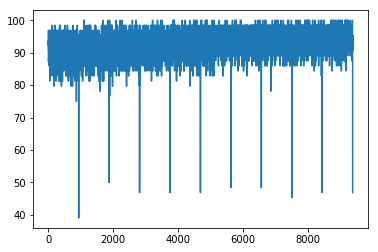

In [0]:
import matplotlib.pyplot as plt
plt.plot(list_acc)
plt.show()